In [1]:
import pickle
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import Dense

2024-06-03 16:07:04.396868: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def load_gaze_data(labels):
    gaze_data = {}
    for user, label_info in labels.items():
        print(user)
        gaze_path = "../data/" + str(user) + "_P/" + str(user) + "_CLNF_gaze.txt"
        feature = pd.read_table(gaze_path, sep=', ', index_col='frame', header=0, engine='python')
        # 清理掉success等于0的行
        feature = feature[feature.success != 0]
        # 重置index
        feature = feature.reset_index(drop=True)
        feature = feature.drop(columns=['success', 'confidence', 'timestamp'])
        # feature = feature.mean() # 取平均值作为向量
        gaze_data[user] = feature
    return gaze_data

In [3]:
def convert_phq8_score_to_label(score):
    if 0 <= score <= 4:
        return 0
    elif 5 <= score <= 9:
        return 1
    elif 10 <= score <= 14:
        return 2
    elif 15 <= score <= 19:
        return 3
    elif 20 <= score <= 24:
        return 4
    else:
        raise ValueError("Invalid PHQ-8 score")

In [4]:
# 准备数据
with open('../feature/train_label.pickle', 'rb') as f:
    train_labels = pickle.load(f)

with open('../feature/dev_label.pickle', 'rb') as f:
    dev_labels = pickle.load(f)

train_data = load_gaze_data(train_labels)
dev_data = load_gaze_data(dev_labels)

print(train_data.keys())
print(dev_data.keys())


303
304
305
310
312
313
315
316
317
318
319
320
321
322
324
325
326
327
328
330
333
336
338
339
340
341
343
344
345
347
348
350
351
352
353
355
356
357
358
360
362
363
364
366
368
369
370
371
372
374
375
376
379
380
383
385
386
391
392
393
397
400
401
402
409
412
414
415
416
419
423
425
426
427
428
429
430
433
434
437
441
443
444
445
446
447
448
449
454
455
456
457
459
463
464
468
471
473
474
475
478
479
485
486
487
488
491
302
307
331
335
346
367
377
381
382
388
389
390
395
403
404
406
413
417
418
420
422
436
439
440
451
458
472
476
477
482
483
484
489
490
492
dict_keys([303, 304, 305, 310, 312, 313, 315, 316, 317, 318, 319, 320, 321, 322, 324, 325, 326, 327, 328, 330, 333, 336, 338, 339, 340, 341, 343, 344, 345, 347, 348, 350, 351, 352, 353, 355, 356, 357, 358, 360, 362, 363, 364, 366, 368, 369, 370, 371, 372, 374, 375, 376, 379, 380, 383, 385, 386, 391, 392, 393, 397, 400, 401, 402, 409, 412, 414, 415, 416, 419, 423, 425, 426, 427, 428, 429, 430, 433, 434, 437, 441, 443, 444, 445, 4

In [5]:
label_ex = {}
for user, label_info in dev_labels.items():
    label_ex[user] = convert_phq8_score_to_label(label_info[1])
print(label_ex)

{302: 0, 307: 0, 331: 1, 335: 2, 346: 4, 367: 3, 377: 3, 381: 3, 382: 0, 388: 3, 389: 2, 390: 1, 395: 1, 403: 0, 404: 0, 406: 0, 413: 2, 417: 1, 418: 2, 420: 0, 422: 2, 436: 0, 439: 0, 440: 3, 451: 0, 458: 1, 472: 0, 476: 0, 477: 0, 482: 0, 483: 3, 484: 1, 489: 0, 490: 0, 492: 0}


In [6]:
print(train_data[304])

            x_0       y_0       z_0       x_1       y_1       z_1      x_h0  \
0     -0.042670  0.113071 -0.992670 -0.146451  0.221127 -0.964186 -0.025168   
1     -0.047612  0.115639 -0.992150 -0.140318  0.228115 -0.963470 -0.044843   
2     -0.044902  0.122461 -0.991457 -0.134773  0.230900 -0.963598 -0.053158   
3     -0.027291  0.119059 -0.992512 -0.136003  0.227390 -0.964260 -0.041602   
4     -0.043528  0.148790 -0.987910 -0.133502  0.237438 -0.962185 -0.053368   
...         ...       ...       ...       ...       ...       ...       ...   
21535 -0.137720  0.244481 -0.959824 -0.253432  0.321223 -0.912463 -0.270875   
21536 -0.116864  0.266157 -0.956819 -0.240557  0.326948 -0.913913 -0.246966   
21537 -0.096418  0.288318 -0.952668 -0.259636  0.333535 -0.906280 -0.223243   
21538 -0.071080  0.256476 -0.963934 -0.203071  0.314617 -0.927242 -0.193554   
21539 -0.060706  0.229676 -0.971372 -0.194052  0.310889 -0.930426 -0.189603   

           y_h0      z_h0      x_h1      y_h1      

In [7]:
# np.save("train_gaze.npy", train_data)
# np.save("dev_gaze.npy", dev_data)

In [8]:
# X_train = []
# X_test = []
# y_train_score = []
# y_train_binary = []
# y_test_score = []
# y_test_binary = []
# for user, feature in train_data.items():
#     X_train.append(feature.tolist())
#     y_train_score.append(convert_phq8_score_to_label(train_labels[user][1]))
#     y_train_binary.append(train_labels[user][0])

# for user, feature in dev_data.items():
#     X_test.append(feature.tolist())
#     y_test_score.append(convert_phq8_score_to_label(dev_labels[user][1]))
#     y_test_binary.append(dev_labels[user][0])

In [9]:
# CNN模型需要输入数据有形状 (samples, time steps, features)
# 因此我们需要调整输入数据的形状
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 样本under-sampling
def under_sampling(X, y):
    X = np.array(X)
    y = np.array(y)
    count = np.bincount(y)
    min_class = np.argmin(count)
    maj_class = np.argmax
    maj_class = np.argmax(count)
    maj_class_indices = np.where(y == maj_class)[0]
    np.random.shuffle(maj_class_indices)
    maj_class_indices = maj_class_indices[:count[min_class]]
    indices = np.concatenate((maj_class_indices, np.where(y == min_class)[0]))
    np.random.shuffle(indices)
    return X[indices], y[indices]


X_train = []
y_train_score = []
y_train_binary = []
X_test = []
y_test_score = []
y_test_binary = []

for user, feature in train_data.items():
    print(user)
    for index, f in feature.iterrows():
        X_train.append(f.tolist())
        y_train_score.append(convert_phq8_score_to_label(train_labels[user][1]))
        y_train_binary.append(train_labels[user][0])
        
for user, feature in dev_data.items():
    print(user)
    for index, f in feature.iterrows():
        X_test.append(f.tolist())
        y_test_score.append(convert_phq8_score_to_label(dev_labels[user][1]))
        y_test_binary.append(dev_labels[user][0])

X_train, y_train_binary = under_sampling(X_train, y_train_binary)

# 打乱数据
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train = X_train[indices]
y_train_binary = y_train_binary[indices]

print(y_train_binary)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train_binary = np.array(y_train_binary)
y_test_binary = np.array(y_test_binary)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


303
304
305
310
312
313
315
316
317
318
319
320
321
322
324
325
326
327
328
330
333
336
338
339
340
341
343
344
345
347
348
350
351
352
353
355
356
357
358
360
362
363
364
366
368
369
370
371
372
374
375
376
379
380
383
385
386
391
392
393
397
400
401
402
409
412
414
415
416
419
423
425
426
427
428
429
430
433
434
437
441
443
444
445
446
447
448
449
454
455
456
457
459
463
464
468
471
473
474
475
478
479
485
486
487
488
491
302
307
331
335
346
367
377
381
382
388
389
390
395
403
404
406
413
417
418
420
422
436
439
440
451
458
472
476
477
482
483
484
489
490
492
[1 1 1 ... 1 1 0]


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 构建CNN模型
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(12, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 编译模型
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint(
    filepath='best_model_2.h5', # 保存最佳模型的文件路径
    monitor='val_accuracy',       # 监控的指标，这里选择验证损失
    save_best_only=True,      # 只保存性能最佳的模型
    mode='max',               # 如果监控指标是损失，则使用 'min' 模式
    save_weights_only=False,  # 保存整个模型（不仅是权重）
    verbose=1                 # 在每次保存时输出一条消息
)

# 训练模型
history1 = model.fit(
    X_train, y_train_binary, 
    validation_data=(X_test, y_test_binary), 
    epochs=20, 
    batch_size=1000,
    callbacks = [checkpoint_callback]
)

2024-06-03 16:09:30.468235: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/20
1586/1586 [==============================] - ETA: 0s - loss: 0.6679 - accuracy: 0.5783
Epoch 1: val_accuracy improved from -inf to 0.52858, saving model to best_model_2.h5
1586/1586 [==============================] - 30s 18ms/step - loss: 0.6679 - accuracy: 0.5783 - val_loss: 0.7035 - val_accuracy: 0.5286
Epoch 2/20
1582/1586 [============================>.] - ETA: 0s - loss: 0.6438 - accuracy: 0.6044
Epoch 2: val_accuracy improved from 0.52858 to 0.54695, saving model to best_model_2.h5
1586/1586 [==============================] - 23s 15ms/step - loss: 0.6438 - accuracy: 0.6044 - val_loss: 0.7117 - val_accuracy: 0.5469
Epoch 3/20
1586/1586 [==============================] - ETA: 0s - loss: 0.6362 - accuracy: 0.6127
Epoch 3: val_accuracy improved from 0.54695 to 0.55555, saving model to best_model_2.h5
1586/1586 [==============================] - 31s 20ms/step - loss: 0.6362 - accuracy: 0.6127 - val_loss: 0.7138 - val_accuracy: 0.5555
Epoch 4/20
1585/1586 [==================

In [11]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model_2.h5')

pred_label = {}
for user, feature in dev_data.items():
    X_test = []
    y_test_binary = []
    print(user)
    for index, f in feature.iterrows():
        X_test.append(f.tolist())
        y_test_binary.append(dev_labels[user][0])
    y_pred = best_model.predict(X_test)
    pred_label[user] = 1 if np.mean(y_pred) > 0.5 else 0
    
# 对比预测标签和真实标签，输出acc
print(pred_label)
acc = 0
for user, label in dev_labels.items():
    if pred_label[user] == label[0]:
        acc += 1
print(acc/len(dev_labels))

302
936/936 [==============================] - 1s 960us/step
307
1146/1146 [==============================] - 1s 1ms/step
331
789/789 [==============================] - 1s 1ms/step
335
770/770 [==============================] - 1s 1ms/step
346
1138/1138 [==============================] - 2s 2ms/step
367
1513/1513 [==============================] - 2s 2ms/step
377
1231/1231 [==============================] - 1s 1ms/step
381
1016/1016 [==============================] - 1s 1ms/step
382
771/771 [==============================] - 1s 1ms/step
388
749/749 [==============================] - 1s 2ms/step
389
717/717 [==============================] - 1s 1ms/step
390
1255/1255 [==============================] - 2s 1ms/step
395
817/817 [==============================] - 1s 877us/step
403
799/799 [==============================] - 1s 1ms/step
404
1045/1045 [==============================] - 2s 2ms/step
406
662/662 [==============================] - 1s 2ms/step
413
917/917 [=========================

In [12]:
import json

with open("gaze_2label.json", "w") as f:
    # change numpy.int64 to int
    pred_label = {int(k): int(v) for k, v in pred_label.items()}
    json.dump(pred_label, f)

In [13]:
# 处理5分类标签
from tensorflow.keras.utils import to_categorical

def under_sampling_score(X, y):
    df = pd.DataFrame(X)
    df['label'] = y
    min_count = df['label'].value_counts().min()
    df_balanced = df.groupby('label').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
    return df_balanced.iloc[:, :-1].values, df_balanced['label'].values

X_train = []
y_train_score = []
y_train_binary = []
X_test = []
y_test_score = []
y_test_binary = []

for user, feature in train_data.items():
    print(user)
    for index, f in feature.iterrows():
        X_train.append(f.tolist())
        y_train_score.append(convert_phq8_score_to_label(train_labels[user][1]))
        y_train_binary.append(train_labels[user][0])

for user, feature in dev_data.items():
    print(user)
    for index, f in feature.iterrows():
        X_test.append(f.tolist())
        y_test_score.append(convert_phq8_score_to_label(dev_labels[user][1]))
        y_test_binary.append(dev_labels[user][0])

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train_score = np.array(y_train_score)
y_test_score = np.array(y_test_score)

X_train, y_train_score = under_sampling_score(X_train, y_train_score)

# 打乱数据
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train = X_train[indices]
y_train_score = y_train_score[indices]

y_train_score = to_categorical(y_train_score, num_classes=5)
y_test_score = to_categorical(y_test_score, num_classes=5)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

303
304
305
310
312
313
315
316
317
318
319
320
321
322
324
325
326
327
328
330
333
336
338
339
340
341
343
344
345
347
348
350
351
352
353
355
356
357
358
360
362
363
364
366
368
369
370
371
372
374
375
376
379
380
383
385
386
391
392
393
397
400
401
402
409
412
414
415
416
419
423
425
426
427
428
429
430
433
434
437
441
443
444
445
446
447
448
449
454
455
456
457
459
463
464
468
471
473
474
475
478
479
485
486
487
488
491
302
307
331
335
346
367
377
381
382
388
389
390
395
403
404
406
413
417
418
420
422
436
439
440
451
458
472
476
477
482
483
484
489
490
492


/tmp/ipykernel_131144/3100887084.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('label').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 构建CNN模型
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(12, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 输出层有5个神经元，使用softmax激活函数

# 编译模型
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 创建一个 ModelCheckpoint 回调函数
checkpoint_callback = ModelCheckpoint(
    filepath='best_model_5.h5', # 保存最佳模型的文件路径
    monitor='val_accuracy',       # 监控的指标，这里选择验证损失
    save_best_only=True,      # 只保存性能最佳的模型
    mode='max',               # 如果监控指标是损失，则使用 'min' 模式
    save_weights_only=False,  # 保存整个模型（不仅是权重）
    verbose=1                 # 在每次保存时输出一条消息
)

# 训练模型
history2 = model.fit(
    X_train, y_train_score, 
    validation_data=(X_test, y_test_score), 
    epochs=20, 
    batch_size=1000,
    callbacks=[checkpoint_callback]
)

Epoch 1/20
434/443 [============================>.] - ETA: 0s - loss: 1.5649 - accuracy: 0.2786
Epoch 1: val_accuracy improved from -inf to 0.19073, saving model to best_model_5.h5
443/443 [==============================] - 8s 15ms/step - loss: 1.5639 - accuracy: 0.2796 - val_loss: 1.6367 - val_accuracy: 0.1907
Epoch 2/20
438/443 [============================>.] - ETA: 0s - loss: 1.4897 - accuracy: 0.3408
Epoch 2: val_accuracy improved from 0.19073 to 0.22990, saving model to best_model_5.h5
443/443 [==============================] - 8s 18ms/step - loss: 1.4894 - accuracy: 0.3409 - val_loss: 1.6034 - val_accuracy: 0.2299
Epoch 3/20
443/443 [==============================] - ETA: 0s - loss: 1.4493 - accuracy: 0.3620
Epoch 3: val_accuracy did not improve from 0.22990
443/443 [==============================] - 10s 23ms/step - loss: 1.4493 - accuracy: 0.3620 - val_loss: 1.6025 - val_accuracy: 0.2198
Epoch 4/20
440/443 [============================>.] - ETA: 0s - loss: 1.4324 - accuracy: 0.

In [15]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model_5.h5')

pred_label = {}
for user, feature in dev_data.items():
    X_test = []
    y_test_score = []
    print(user)
    for index, f in feature.iterrows():
        X_test.append(f.tolist())
        y_test_score.append(convert_phq8_score_to_label(dev_labels[user][1]))
    y_pred = best_model.predict(X_test)
    y_pred = np.mean(y_pred, axis=0)
    print(y_pred)
    # 五个维度中，取概率最大的索引值
    max_value = max(y_pred)
    pred_label[user] = y_pred.tolist().index(max_value)    
# 对比预测标签和真实标签，输出acc
print(pred_label)

acc = 0
for user, label in dev_labels.items():
    if pred_label[user] == label[0]:
        acc += 1
print(acc/len(dev_labels))

302
936/936 [==============================] - 1s 1ms/step
[0.2493372  0.23394062 0.25300103 0.17261554 0.09110379]
307
1146/1146 [==============================] - 1s 1ms/step
[0.22823869 0.22912194 0.25966024 0.19415866 0.08881152]
331
789/789 [==============================] - 1s 2ms/step
[0.28178278 0.11511014 0.29816762 0.03799429 0.26694596]
335
770/770 [==============================] - 1s 2ms/step
[0.30147797 0.26560047 0.24955453 0.13826624 0.04510184]
346
1138/1138 [==============================] - 2s 2ms/step
[0.24037692 0.2640028  0.25641528 0.18077609 0.05842683]
367
1513/1513 [==============================] - 1s 916us/step
[0.24703452 0.22544919 0.23677002 0.19930235 0.09144367]
377
1231/1231 [==============================] - 1s 836us/step
[0.19623025 0.2639489  0.20162457 0.24745536 0.09074086]
381
1016/1016 [==============================] - 1s 914us/step
[0.25950417 0.24412146 0.2894703  0.17368132 0.03322185]
382
771/771 [==============================] - 1s 950us/

In [ ]:
import json

with open("gaze_5label.json", "w") as f:
    # change numpy.int64 to int
    pred_label = {int(k): int(v) for k, v in pred_label.items()}
    json.dump(pred_label, f)

In [17]:
print(history1)

In [24]:
# Visualization
import matplotlib.pyplot as plt
train_loss = history1.history['loss']
test_loss = history1.history['val_loss']
train_acc = history1.history['accuracy']
test_acc = history1.history['val_accuracy']

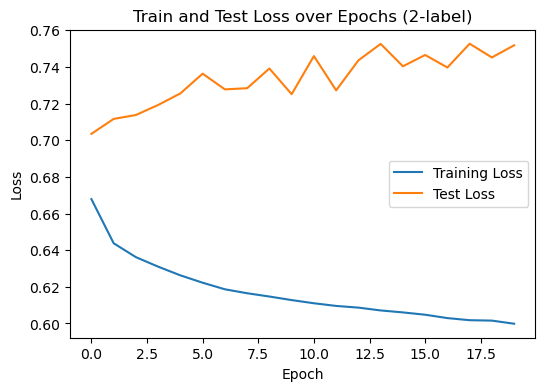

In [25]:
plt.figure(figsize=(6, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Test Loss over Epochs (2-label)')

plt.show()

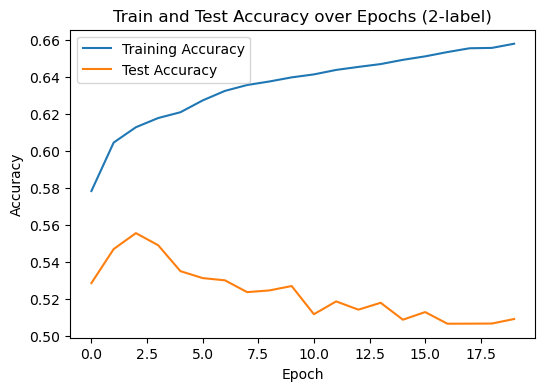

In [26]:
plt.figure(figsize=(6, 4))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy over Epochs (2-label)')

plt.show()

In [27]:
train_loss = history2.history['loss']
test_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
test_acc = history2.history['val_accuracy']

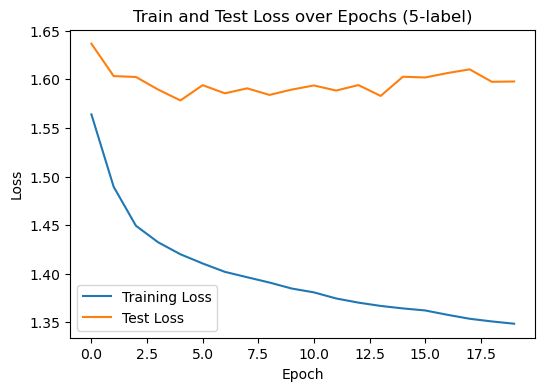

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Test Loss over Epochs (5-label)')

plt.show()

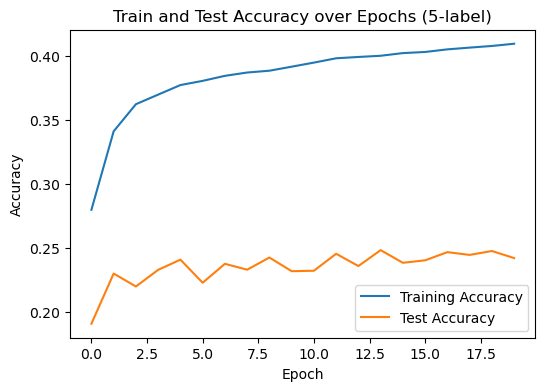

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy over Epochs (5-label)')
plt.show()